# TensorFlow Basics
____

Importing libraries and reading csv file:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


Exploring the dataset using a pairplot 

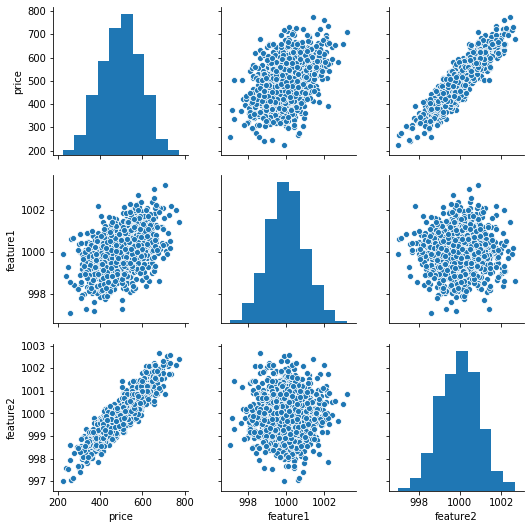

In [4]:
sns.pairplot(df)
plt.show()

## Preparing train and test sets

In [5]:
from sklearn.model_selection import train_test_split

**We have to pass in numpy arrays instead of Panda's data frame, by adding .values to the end of series or data frame and it'll return it back as numpy array** 

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalize and scale features to avoid any network training issues

In [9]:
from sklearn.preprocessing import MinMaxScaler
# help(MinMaxScaler)

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

## Creating and training a model
____

Importing Sequential model and Dense from tensorflow.kears

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
#help(Sequential)
#help(Dense)

Building normal feed forward network

In [16]:
# The first way to build a model
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [17]:
# The second way to build a model
# More convenient way, due to quick editing of layers
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))

# last layer will be just one final output node, because we trying to predict price.
model.add(Dense(1))

# Compiling a model
model.compile(optimizer='rmsprop',loss='mse')

Training the model

In [18]:
 model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 589us/step - loss: 255528.9531
Epoch 2/250
22/22 [==============================] - 0s 544us/step - loss: 255234.0312
Epoch 3/250
22/22 [==============================] - 0s 589us/step - loss: 254944.0625
Epoch 4/250
22/22 [==============================] - 0s 589us/step - loss: 254633.7188
Epoch 5/250
22/22 [==============================] - 0s 589us/step - loss: 254298.6719
Epoch 6/250
22/22 [==============================] - 0s 635us/step - loss: 253941.4844
Epoch 7/250
22/22 [==============================] - 0s 544us/step - loss: 253559.1562
Epoch 8/250
22/22 [==============================] - 0s 543us/step - loss: 253148.9531
Epoch 9/250
22/22 [==============================] - 0s 634us/step - loss: 252710.0156
Epoch 10/250
22/22 [==============================] - 0s 635us/step - loss: 252246.7500
Epoch 11/250
22/22 [==============================] - 0s 725us/step - loss: 251752.8281
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 680us/step - loss: 37841.8789
Epoch 95/250
22/22 [==============================] - 0s 680us/step - loss: 34344.4414
Epoch 96/250
22/22 [==============================] - 0s 635us/step - loss: 30995.4512
Epoch 97/250
22/22 [==============================] - 0s 635us/step - loss: 27748.3379
Epoch 98/250
22/22 [==============================] - 0s 635us/step - loss: 24633.7109
Epoch 99/250
22/22 [==============================] - 0s 639us/step - loss: 21665.0938
Epoch 100/250
22/22 [==============================] - 0s 635us/step - loss: 18852.0449
Epoch 101/250
22/22 [==============================] - 0s 590us/step - loss: 16206.4424
Epoch 102/250
22/22 [==============================] - 0s 590us/step - loss: 13738.3057
Epoch 103/250
22/22 [==============================] - 0s 635us/step - loss: 11477.4424
Epoch 104/250
22/22 [==============================] - 0s 588us/step - loss: 9423.4404
Epoch 105/250
22/22 [==============================]

22/22 [==============================] - 0s 544us/step - loss: 311.0417
Epoch 189/250
22/22 [==============================] - 0s 545us/step - loss: 299.8182
Epoch 190/250
22/22 [==============================] - 0s 544us/step - loss: 289.0463
Epoch 191/250
22/22 [==============================] - 0s 544us/step - loss: 277.6212
Epoch 192/250
22/22 [==============================] - 0s 679us/step - loss: 266.8380
Epoch 193/250
22/22 [==============================] - 0s 635us/step - loss: 256.9001
Epoch 194/250
22/22 [==============================] - 0s 591us/step - loss: 247.9478
Epoch 195/250
22/22 [==============================] - 0s 544us/step - loss: 238.6843
Epoch 196/250
22/22 [==============================] - 0s 499us/step - loss: 228.6425
Epoch 197/250
22/22 [==============================] - 0s 499us/step - loss: 219.1778
Epoch 198/250
22/22 [==============================] - 0s 543us/step - loss: 209.3470
Epoch 199/250
22/22 [==============================] - 0s 543us/step

Check for changes in loss

In [19]:
loss_df = pd.DataFrame(model.history.history)

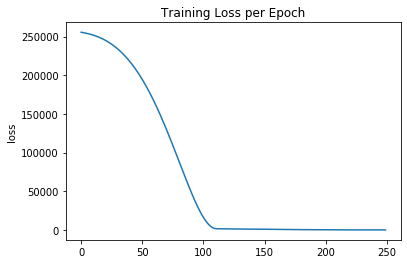

In [20]:
sns.lineplot(x=range(len(loss_df['loss'])),y=loss_df['loss'])
plt.title('Training Loss per Epoch')
plt.show()

In [21]:
model.evaluate(X_test, y_test, verbose=0)

26.079450607299805

In [22]:
model.evaluate(X_train, y_train, verbose=0)

24.880456924438477

Prediction

In [23]:
test_predictions = model.predict(X_test)

In [24]:
test_predictions

array([[406.4222 ],
       [622.6082 ],
       [591.28406],
       [572.2672 ],
       [369.04675],
       [578.8066 ],
       [516.0533 ],
       [459.36554],
       [549.4869 ],
       [447.8135 ],
       [610.9427 ],
       [547.7967 ],
       [420.17255],
       [410.18613],
       [649.0777 ],
       [437.8669 ],
       [507.83844],
       [659.45276],
       [661.6249 ],
       [564.7839 ],
       [336.51096],
       [445.6502 ],
       [384.22733],
       [380.097  ],
       [566.26807],
       [610.2717 ],
       [532.4601 ],
       [428.69177],
       [654.76306],
       [414.76602],
       [443.05695],
       [485.50223],
       [439.16418],
       [680.7888 ],
       [425.0984 ],
       [419.09576],
       [501.15097],
       [550.1586 ],
       [510.59686],
       [397.469  ],
       [617.50226],
       [417.3821 ],
       [603.52856],
       [446.04858],
       [502.22507],
       [580.16656],
       [666.8918 ],
       [490.3681 ],
       [320.10922],
       [485.89133],


Comparing predicted and true values 

In [25]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [27]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [29]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [30]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.422211
1,624.156198,622.608215
2,582.455066,591.284058
3,578.588606,572.267212
4,371.224104,369.046753
...,...,...
295,525.704657,529.423096
296,502.909473,516.944824
297,612.727910,608.745972
298,417.569725,417.539215


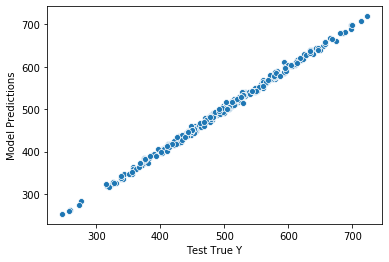

In [33]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.show()

Checking the prediction error

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.142619435653111

In [37]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


The mean absolute error is less then 1%m which means that model is preforming very well!

In [38]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.07945511269839

In [40]:
#Root mean squared error
np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']))

5.106804785058696

## Predicting on the brand new data
____

In [41]:
new_gem = [[998, 1000]]

In [43]:
new_gem = scaler.transform(new_gem)

In [44]:
model.predict(new_gem)

array([[421.5491]], dtype=float32)

## Saving model
____

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save('my_gem_model.h5')

In [49]:
later_model = load_model('my_gem_model.h5')

In [50]:
later_model.predict(new_gem)

array([[421.5491]], dtype=float32)

A loaded model predicts the same result as the original model.
____